# Inter-Class

> Relationship between different classes

In [ ]:
#| hide
from nbdev.showdoc import *

In [ ]:
from statistics import mean
from fastai.vision.all import *

from similarity_learning.all import *

from Few_Shot_Feature_Space.utils import *

In [ ]:
def inter_class_angles(features_by_class, n_samples=int(1e5)):
    centroids = [f.centroid for f in features_by_class.values()]
    dl = TfmdDL(range(n_samples),
                num_workers=0,
                after_item=lambda _: random.sample(centroids, 2),
                after_batch=lambda o: F.cosine_similarity(*o).arccos().rad2deg())
    return torch.cat(list(progress_bar(dl))).cpu()

def inter_class_hist(dl, fe):
    class_ftrs = ClassFeatures.compute(dl, fe)
    angles = inter_class_angles(class_ftrs)
    ax = plot_hist(angles)
    ax.set_title(f"{len(class_ftrs)} classes with ~{mean(len(f) for f in class_ftrs.values()):.1f} samples per class")


In [ ]:
vggface2_fe, casia_webface_fe = fr_feature_extractors()
lfw_dl, pfr_dl = fr_dataloaders()

## VGGFace2

### LFW

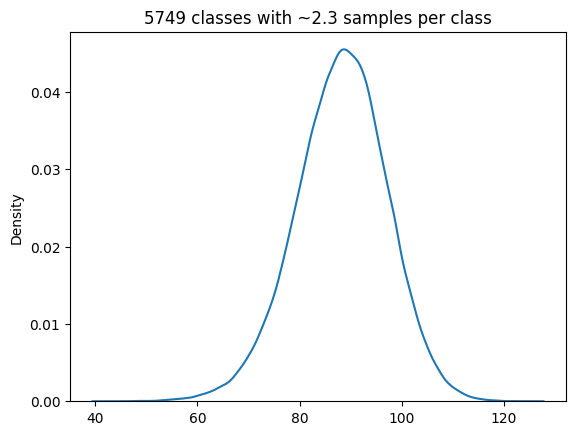

In [ ]:
inter_class_hist(lfw_dl, vggface2_fe)

### PFR

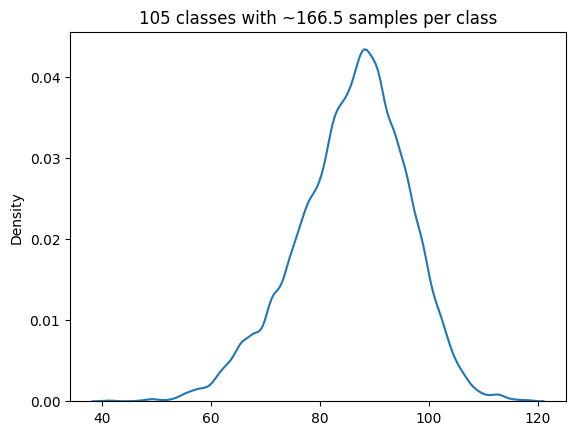

In [ ]:
inter_class_hist(pfr_dl, vggface2_fe)

## CASIA-WebFace

### LFW

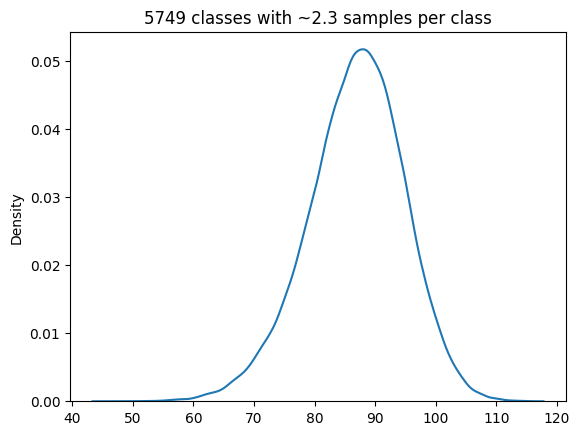

In [ ]:
inter_class_hist(lfw_dl, casia_webface_fe)

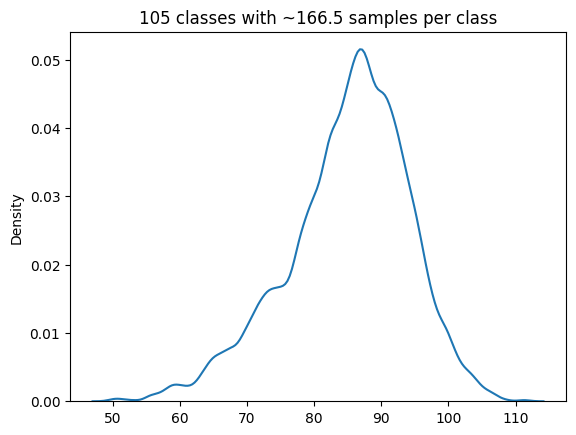

In [ ]:
inter_class_hist(pfr_dl, casia_webface_fe)